In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import datetime
import statsmodels.api as sm
from scipy.stats.stats import spearmanr

df = pd.read_csv('C:\data\corona\df13.csv', sep=',')
print(df.head())
print(df.columns)

         date  county-identifier             county  area in sq. km  \
0  2020-02-16               5370          Heinsberg          627.91   
1  2020-02-17               5370          Heinsberg          627.91   
2  2020-02-17               5158           Mettmann          407.22   
3  2020-02-18               5370          Heinsberg          627.91   
4  2020-02-18               5111  Düsseldorf, Stadt          217.41   

   total population  population per sq. km  percentage of infected  \
0            255555                    407                0.000016   
1            255555                    407                0.000008   
2            485570                   1192                0.000002   
3            255555                    407                0.000004   
4            621877                   2860                0.000002   

   average unemployment rate 2019  disposable income per inhabitant (€)  \
0                        0.026666                                 20631   
1 

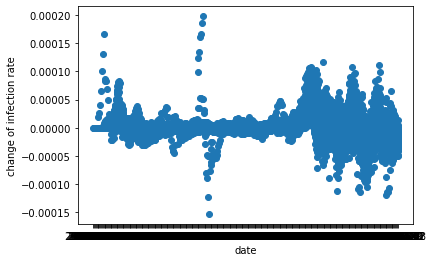

In [2]:
plt.scatter(df['date'], df['change of infection rate'])
plt.xlabel('date')
plt.ylabel('change of infection rate')
plt.show()

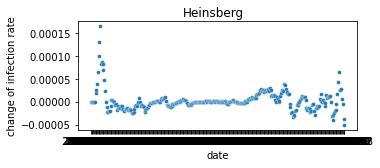

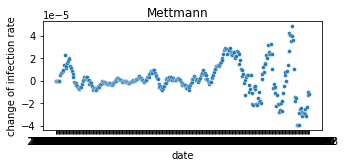

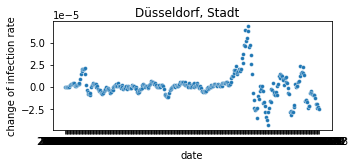

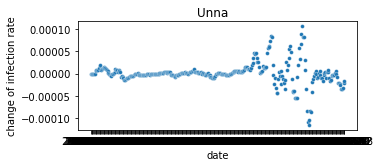

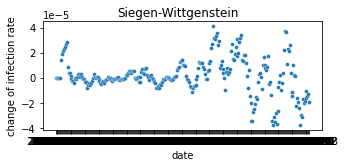

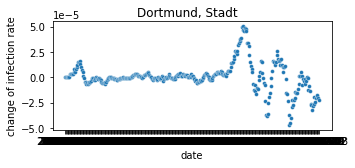

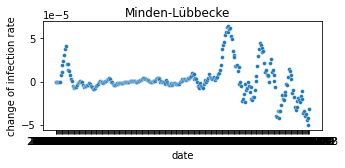

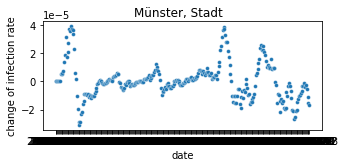

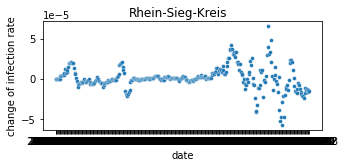

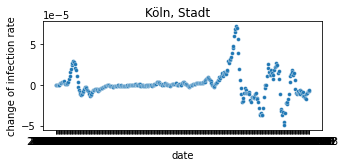

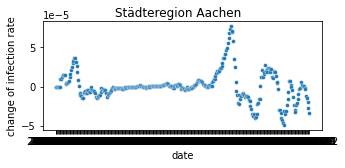

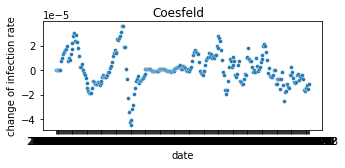

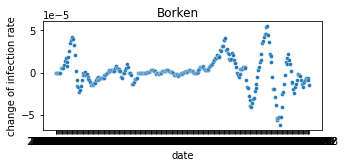

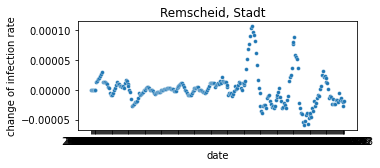

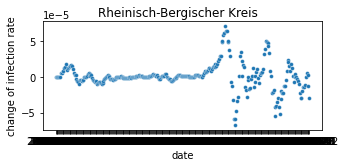

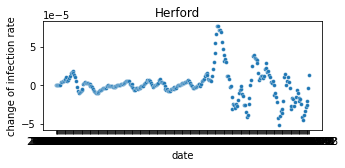

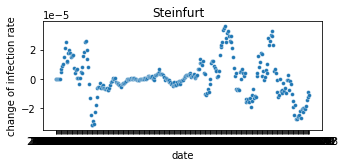

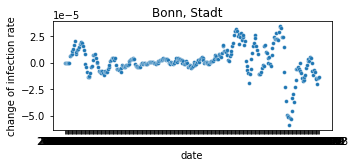

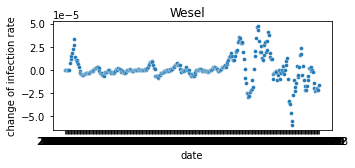

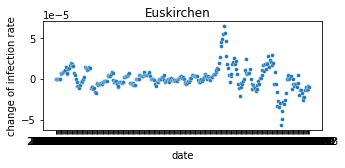

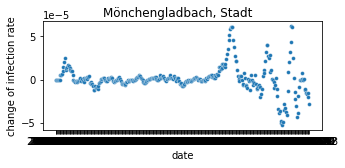

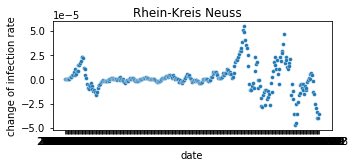

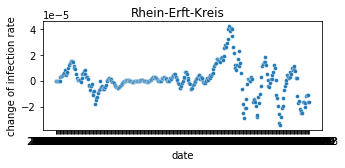

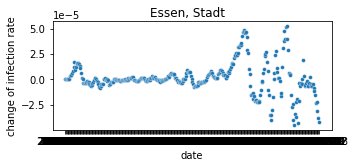

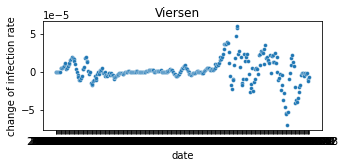

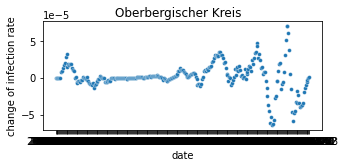

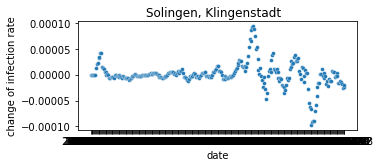

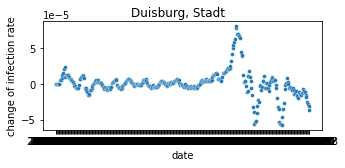

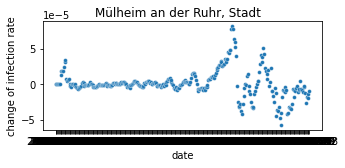

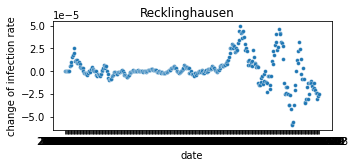

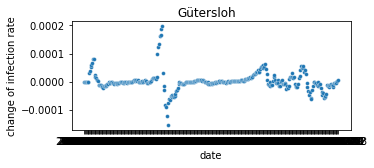

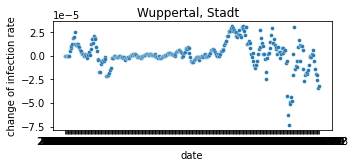

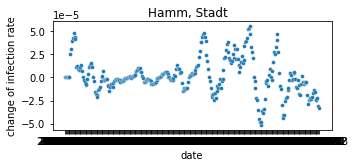

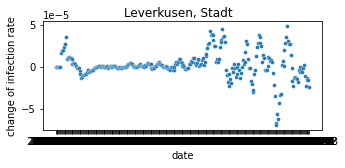

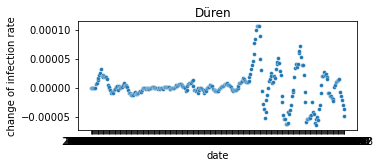

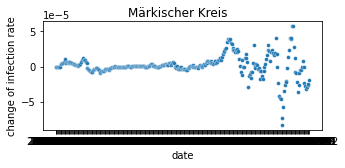

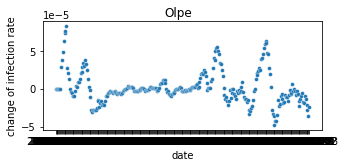

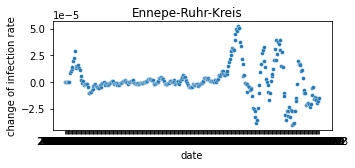

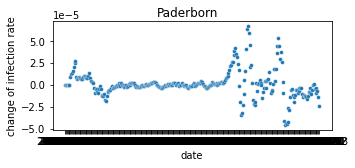

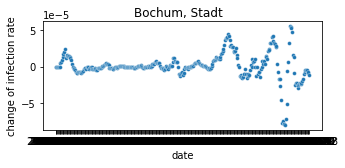

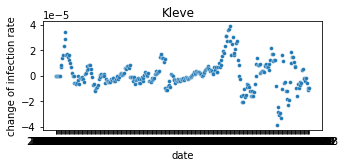

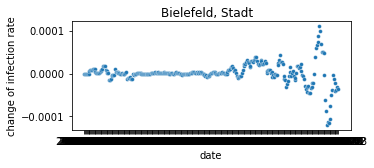

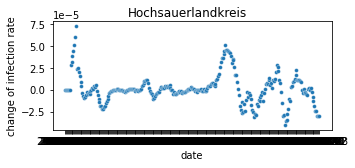

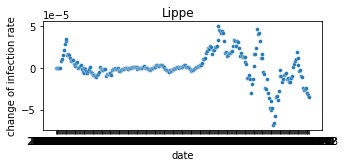

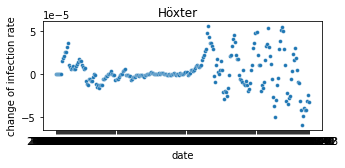

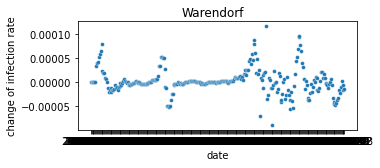

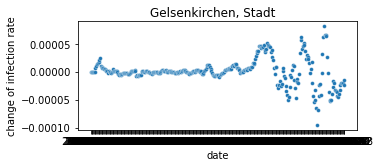

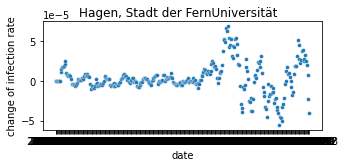

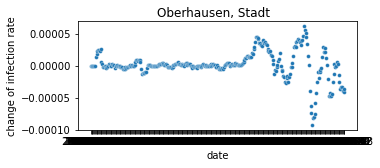

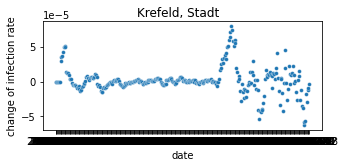

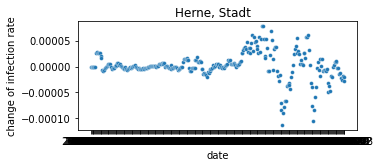

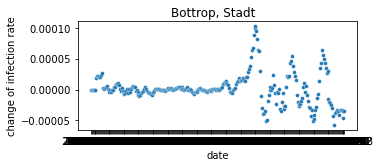

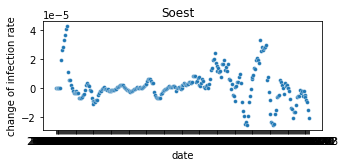

In [3]:
county = ['Heinsberg', 'Mettmann', 'Düsseldorf, Stadt', 'Unna', 'Siegen-Wittgenstein',
 'Dortmund, Stadt', 'Minden-Lübbecke', 'Münster, Stadt', 'Rhein-Sieg-Kreis',
 'Köln, Stadt', 'Städteregion Aachen', 'Coesfeld', 'Borken',
 'Remscheid, Stadt', 'Rheinisch-Bergischer Kreis', 'Herford', 'Steinfurt',
 'Bonn, Stadt', 'Wesel', 'Euskirchen', 'Mönchengladbach, Stadt',
 'Rhein-Kreis Neuss', 'Rhein-Erft-Kreis', 'Essen, Stadt', 'Viersen',
 'Oberbergischer Kreis', 'Solingen, Klingenstadt', 'Duisburg, Stadt',
 'Mülheim an der Ruhr, Stadt', 'Recklinghausen', 'Gütersloh',
 'Wuppertal, Stadt', 'Hamm, Stadt', 'Leverkusen, Stadt', 'Düren',
 'Märkischer Kreis', 'Olpe', 'Ennepe-Ruhr-Kreis', 'Paderborn', 'Bochum, Stadt',
 'Kleve', 'Bielefeld, Stadt', 'Hochsauerlandkreis', 'Lippe', 'Höxter',
 'Warendorf', 'Gelsenkirchen, Stadt', 'Hagen, Stadt der FernUniversität',
 'Oberhausen, Stadt', 'Krefeld, Stadt', 'Herne, Stadt', 'Bottrop, Stadt',
 'Soest']

for c in county:
    dfc=df[df['county']==c]
    sns.scatterplot(x=dfc['date'], y=dfc['change of infection rate'], s=15)
    fig = plt.gcf()
    fig.set_size_inches(5, 2)
    fig.suptitle(c, fontsize=12)
    plt.show()

In [4]:
df['school lessons'] = 'school-' + df['school lessons'].astype(str)
df['university lectures'] = 'uni-' + df['university lectures'].astype(str)
df['restaurants'] = 'rest.-' + df['restaurants'].astype(str)
df['number of guests at a wedding'] = 'wed.-' + df['number of guests at a wedding'].astype(str)
df['number of people you can meet in public'] = 'meet-' + df['number of people you can meet in public'].astype(str)

df['date'] = pd.to_datetime(df['date'])
print(df.head())

        date  county-identifier             county  area in sq. km  \
0 2020-02-16               5370          Heinsberg          627.91   
1 2020-02-17               5370          Heinsberg          627.91   
2 2020-02-17               5158           Mettmann          407.22   
3 2020-02-18               5370          Heinsberg          627.91   
4 2020-02-18               5111  Düsseldorf, Stadt          217.41   

   total population  population per sq. km  percentage of infected  \
0            255555                    407                0.000016   
1            255555                    407                0.000008   
2            485570                   1192                0.000002   
3            255555                    407                0.000004   
4            621877                   2860                0.000002   

   average unemployment rate 2019  disposable income per inhabitant (€)  \
0                        0.026666                                 20631   
1       

In [5]:
def onehot_enc(df, col):
    enc_oh = OneHotEncoder(sparse=False)
    enc_oh.fit(df[[col]])
    category_columns = np.concatenate(enc_oh.categories_)
    encoded_features = enc_oh.transform(df[[col]])

    df[category_columns] = pd.DataFrame(
            encoded_features,
            columns=category_columns,
            index=df.index)
    return df.drop([col], axis =1)

onehot_enc(df, 'school lessons')
onehot_enc(df, 'university lectures')
onehot_enc(df, 'restaurants')
onehot_enc(df, 'number of guests at a wedding')
onehot_enc(df, 'number of people you can meet in public')

print(df.columns)

Index(['date', 'county-identifier', 'county', 'area in sq. km',
       'total population', 'population per sq. km', 'percentage of infected',
       'average unemployment rate 2019',
       'disposable income per inhabitant (€)', 'CDU%', 'SPD%', 'FDP%', 'AfD%',
       'Bündnis 90/Die Grünen%', 'DIE LINKE%', 'PIRATEN%', 'other parties%',
       'school lessons', 'university lectures',
       'obligation to wear a mask in shops', 'restaurants',
       'number of guests at a wedding',
       'number of people you can meet in public', 'mean infection rate-7d',
       'mean infection rate-14d', 'change of infection rate',
       'school-holidays', 'school-in-class lessons for graduation classes',
       'school-in-class lessons with masks',
       'school-in-class lessons without masks',
       'school-in-class lessons, for primary school pupils without masks',
       'school-in-class lessons, partially with masks', 'school-online',
       'school-part-time in-class lessons',
       'school

In [25]:
df['two weeks later'] = df['date'] + datetime.timedelta(days=14)

df1 = df.filter(['date','county-identifier','change of infection rate'], axis=1)
df1 = df1.rename(columns={'date': 'two weeks later'})
df1 = df1.rename(columns={'change of infection rate': 'change of infection rate shifted'})

df2 = pd.merge(df, df1, on = ['two weeks later', 'county-identifier'], how = 'inner')

measures = ['school-holidays', 'school-in-class lessons for graduation classes',
       'school-in-class lessons with masks',
       'school-in-class lessons without masks',
       'school-in-class lessons, for primary school pupils without masks',
       'school-in-class lessons, partially with masks', 'school-online',
       'school-part-time in-class lessons',
       'school-part-time in-class lessons for primary school pupils and last three oldest classes of secondary schools',
       'uni-holidays', 'uni-online', 'rest.-closed', 'rest.-open',
       'rest.-open with restrictions',
       'wed.-celebration with two households, except family',
       'wed.-hygiene concept necessary for more than 100 guests',
       'wed.-maximal 150 guests', 'wed.-maximal 50 guests',
       'wed.-no wedding celebreation allowed', 'wed.-unlimited',
       'meet-Christmas with up to five households of one family',
       'meet-limited to one person, except family',
       'meet-meetings of two households',
       'meet-meetings of two households, except family',
       'meet-meetings of up to ten people', 'meet-unlimited']

print('weak negative correlation:')
for m in measures:
    if spearmanr(df2[m], df2['change of infection rate shifted'])[1] <=0.05:
        if spearmanr(df2[m], df2['change of infection rate shifted'])[0] <=-0.2:
            print(m)
            print(spearmanr(df2[m], df2['change of infection rate shifted']))

print('')
print('very weak negative correlation:')
for m in measures:
    if spearmanr(df2[m], df2['change of infection rate shifted'])[1] <=0.05:
        if spearmanr(df2[m], df2['change of infection rate shifted'])[0] <=0 and spearmanr(df2[m], df2['change of infection rate shifted'])[0] >-0.2:
            print(m)
            print(spearmanr(df2[m], df2['change of infection rate shifted']))
            
print('')
print('very weak positive correlation:')            
for m in measures:
    if spearmanr(df2[m], df2['change of infection rate shifted'])[1] <=0.05:
        if spearmanr(df2[m], df2['change of infection rate shifted'])[0] >=0 and spearmanr(df2[m], df2['change of infection rate shifted'])[0]<0.2:
            print(m)
            print(spearmanr(df2[m], df2['change of infection rate shifted']))
            
print('')
print('weak positive correlation:')
for m in measures:
    if spearmanr(df2[m], df2['change of infection rate shifted'])[1] <=0.05:
        if spearmanr(df2[m], df2['change of infection rate shifted'])[0] >=0.2:
            print(m)
            print(spearmanr(df2[m], df2['change of infection rate shifted']))

weak negative correlation:
school-online
SpearmanrResult(correlation=-0.24897345315333197, pvalue=4.017486151193143e-203)
uni-online
SpearmanrResult(correlation=-0.22694729596028712, pvalue=3.3150083536586755e-168)
rest.-closed
SpearmanrResult(correlation=-0.3267599372704376, pvalue=0.0)
wed.-hygiene concept necessary for more than 100 guests
SpearmanrResult(correlation=-0.2294802290968741, pvalue=4.8780234921150905e-172)
meet-meetings of two households
SpearmanrResult(correlation=-0.24198930503417812, pvalue=1.1675533729969513e-191)

very weak negative correlation:
school-in-class lessons for graduation classes
SpearmanrResult(correlation=-0.05217778931844355, pvalue=3.456192695770872e-10)
school-in-class lessons, for primary school pupils without masks
SpearmanrResult(correlation=-0.09790495130828536, pvalue=4.000037711996053e-32)
school-part-time in-class lessons for primary school pupils and last three oldest classes of secondary schools
SpearmanrResult(correlation=-0.0306955991909